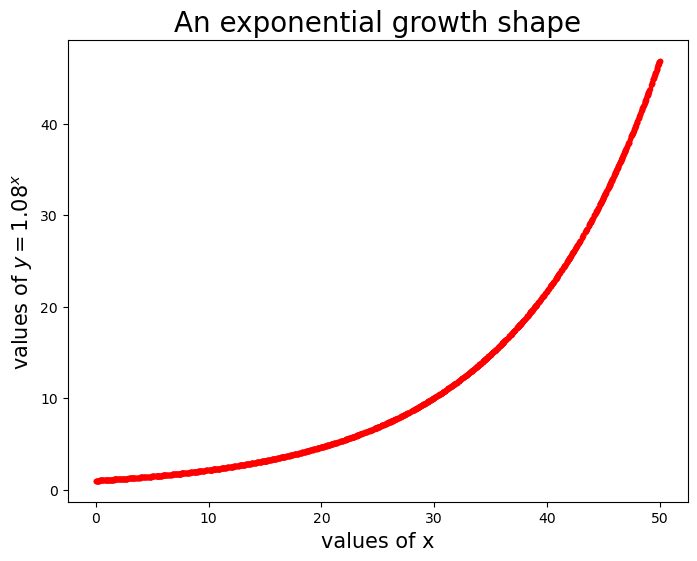

In [1]:
import torch 
torch.manual_seed(0)
observations = 2048 
train_data = torch.zeros((observations, 2))
train_data[:,0] = 50 * torch.rand(observations)
train_data[:, 1] = 1.08 ** train_data[:,0]
import matplotlib.pyplot as plt

fig=plt.figure(dpi=100,figsize=(8,6))
plt.plot(train_data[:,0],train_data[:,1],".",c="r")    #A
plt.xlabel("values of x",fontsize=15)
plt.ylabel("values of $y=1.08^x$",fontsize=15)    #B
plt.title("An exponential growth shape",fontsize=20)    #C
plt.show()

In [2]:
from torch.utils.data import DataLoader
batch_size = 128 
train_loader = DataLoader(
    train_data, 
    batch_size=batch_size,
    shuffle=True
                          )
batch0 = next(iter(train_loader))
print(batch0)

tensor([[41.9333, 25.2099],
        [ 8.0561,  1.8589],
        [22.2487,  5.5416],
        [49.9585, 46.7522],
        [ 8.7647,  1.9631],
        [ 3.0979,  1.2692],
        [26.0517,  7.4259],
        [38.2393, 18.9716],
        [37.1300, 17.4191],
        [45.0543, 32.0541],
        [ 8.7989,  1.9683],
        [20.4796,  4.8362],
        [46.7506, 36.5243],
        [21.8242,  5.3635],
        [11.2329,  2.3738],
        [40.3307, 22.2845],
        [47.0477, 37.3691],
        [47.6369, 39.1026],
        [16.2331,  3.4880],
        [11.7535,  2.4709],
        [12.8855,  2.6958],
        [20.6749,  4.9095],
        [ 4.6602,  1.4314],
        [26.3385,  7.5916],
        [31.7039, 11.4727],
        [45.5565, 33.3172],
        [41.3369, 24.0788],
        [26.8584,  7.9015],
        [14.9879,  3.1692],
        [33.7039, 13.3817],
        [47.7350, 39.3988],
        [31.7714, 11.5324],
        [ 7.4853,  1.7790],
        [14.5973,  3.0754],
        [31.4056, 11.2122],
        [35.8166, 15

In [5]:
import torch.nn as nn 
device = "cuda" if torch.cuda.is_available() else "cpu"
D = nn.Sequential(
    nn.Linear(2, 256),
    nn.ReLU(),
    nn.Dropout(0.3),
    nn.Linear(256, 128),
    nn.ReLU(),
    nn.Dropout(0.3),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Dropout(0.3),
    nn.Linear(64, 1),
    nn.Sigmoid()
).to(device)

In [6]:
G = nn.Sequential(
    nn.Linear(2,16),
    nn.ReLU(),
    nn.Linear(16,32),
    nn.ReLU(),
    nn.Linear(32,2)
).to(device)

In [8]:
loss_fn = nn.BCELoss()
lr = 0.0005
optimD=torch.optim.Adam(D.parameters(), lr=lr)
optimG =torch.optim.Adam(G.parameters(), lr=lr)

mse = nn.MSELoss()
def performance(fake_samples):
    real = 1.08 ** fake_samples[:,0]
    mseloss = mse(fake_samples[:,1],real)
    return mseloss

class EarlyStop:
    def __init__(self, patience=1000):    #A
        self.patience = patience
        self.steps = 0
        self.min_gdif = float('inf')
    def stop(self, gdif):    #B
        if gdif < self.min_gdif:    #C
            self.min_gdif = gdif
            self.steps = 0
        elif gdif >= self.min_gdif:
            self.steps += 1
        if self.steps >= self.patience:    #D
            return True
        else:
            return False

stopper=EarlyStop()

In [9]:
real_labels = torch.ones((batch_size,1))
real_labels = real_labels.to(device)
fake_labels = torch.zeros((batch_size,1))
fake_labels = fake_labels.to(device)